In [126]:
import FinanceDataReader as fdr 

df = fdr.DataReader("035420", start='2021')
df = df[['Close']]
df

,Close
Date,
2021-01-04,293000
2021-01-05,292500
2021-01-06,290000
2021-01-07,289500
2021-01-08,312000
...,...
2024-09-19,160600
2024-09-20,159900
2024-09-23,166700


In [34]:
df['Close'].shift(1)

Date
2021-01-04         NaN
2021-01-05    293000.0
2021-01-06    292500.0
2021-01-07    290000.0
2021-01-08    289500.0
                ...   
2024-09-19    160100.0
2024-09-20    160600.0
2024-09-23    159900.0
2024-09-24    166700.0
2024-09-25    168000.0
Name: Close, Length: 919, dtype: float64

In [36]:
((df['Close'] - df['Close'].shift(1)) * 100 / df['Close']).fillna(1)

Date
2021-01-04    1.000000
2021-01-05   -0.170940
2021-01-06   -0.862069
2021-01-07   -0.172712
2021-01-08    7.211538
                ...   
2024-09-19    0.311333
2024-09-20   -0.437774
2024-09-23    4.079184
2024-09-24    0.773810
2024-09-25   -1.083032
Name: Close, Length: 919, dtype: float64

In [43]:
def return_fn(df):
    return df['Close'].pct_change().fillna(0) 

df_return = return_fn(df)
df_return

Date
2021-01-04    0.000000
2021-01-05   -0.001706
2021-01-06   -0.008547
2021-01-07   -0.001724
2021-01-08    0.077720
                ...   
2024-09-19    0.003123
2024-09-20   -0.004359
2024-09-23    0.042527
2024-09-24    0.007798
2024-09-25   -0.010714
Name: Close, Length: 919, dtype: float64

In [47]:
def cum_return_fn(df_return):
    return (df_return+1).cumprod()

df_cum_return = cum_return_fn(df_return)
df_cum_return - 1

Date
2021-01-04    0.000000
2021-01-05   -0.001706
2021-01-06   -0.010239
2021-01-07   -0.011945
2021-01-08    0.064846
                ...   
2024-09-19   -0.451877
2024-09-20   -0.454266
2024-09-23   -0.431058
2024-09-24   -0.426621
2024-09-25   -0.432765
Name: Close, Length: 919, dtype: float64

## DRAW DOWN
"고점 대비 빠진 폭" = 새로 갱신되는 고점에 DD는 0이 됨. 

=> 전 고점 대비 얼마나 빠졌느냐를 아는 수치 



In [58]:
df['Return'] = return_fn(df)
df['CumReturn'] = cum_return_fn(df['Return'])
df['MaxCumReturn'] = df['CumReturn'].cummax()
df['DrawDown'] = (df['CumReturn'] / df['MaxCumReturn']) - 1

df

,Close,Return,CumReturn,MaxCumReturn,DrawDown
Date,,,,,
2021-01-04,293000,0.000000,1.000000,1.000000,0.000000
2021-01-05,292500,-0.001706,0.998294,1.000000,-0.001706
2021-01-06,290000,-0.008547,0.989761,1.000000,-0.010239
2021-01-07,289500,-0.001724,0.988055,1.000000,-0.011945
2021-01-08,312000,0.077720,1.064846,1.064846,0.000000
...,...,...,...,...,...
2024-09-19,160600,0.003123,0.548123,1.549488,-0.646256
2024-09-20,159900,-0.004359,0.545734,1.549488,-0.647797
2024-09-23,166700,0.042527,0.568942,1.549488,-0.632819


<Axes: xlabel='Date'>

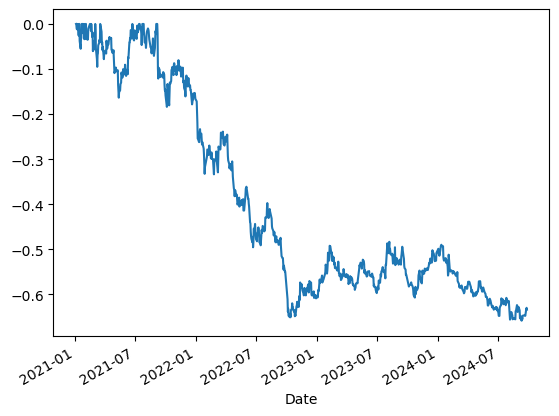

In [60]:
df['DrawDown'].plot()

In [74]:
df

,Close,Return,CumReturn,MaxCumReturn,DrawDown
Date,,,,,
2021-01-04,293000,0.000000,1.000000,1.000000,0.000000
2021-01-05,292500,-0.001706,0.998294,1.000000,-0.001706
2021-01-06,290000,-0.008547,0.989761,1.000000,-0.010239
2021-01-07,289500,-0.001724,0.988055,1.000000,-0.011945
2021-01-08,312000,0.077720,1.064846,1.064846,0.000000
...,...,...,...,...,...
2024-09-19,160600,0.003123,0.548123,1.549488,-0.646256
2024-09-20,159900,-0.004359,0.545734,1.549488,-0.647797
2024-09-23,166700,0.042527,0.568942,1.549488,-0.632819


In [78]:
mdd = df['DrawDown'].min()
mdd

-0.6585903083700438

In [84]:
# 최저가 
min_close_value = df['Close'].min()
# 최저가 날짜 
min_date = df.index[df['Close'].argmin()]
# 최고가 
max_close_value = df['Close'].max()

print(f"최고: {max_close_value}, 최저: {min_close_value}, MDD: {round(mdd*100, 2)} 최저 날짜: {min_date}")

최고: 454000, 최저: 155000, MDD: -65.86 최저 날짜: 2024-09-09 00:00:00


In [98]:
df_max_close = df[df['DrawDown'] == 0]
df_max_close.loc[df.index[len(df) - 1]] = 0
period = df_max_close.index[1:] - df_max_close.index[:-1]
mdd_days = period.days
max_period = mdd_days.max()
max_period_idx = mdd_days.argmax()

C:\Users\longbee\AppData\Local\Temp\ipykernel_63484\2675518963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max_close.loc[df.index[len(df) - 1]] = 0


In [106]:
print(f"Max Draw Down: {df_max_close.index[:-1][max_period_idx].date()}, ~ {df_max_close.index[1:][max_period_idx].date()}")

Max Draw Down: 2021-09-06, ~ 2024-09-25


In [110]:
print(f"{max_period} Days")

1115 Days


In [116]:
print(f"Max Period: {max_period}")

Max Period: 1115


In [140]:
def mdd_fn(df):
    df = df[['Close']].copy()

    def return_fn(df):
        return df['Close'].pct_change().fillna(0)
    def cum_return_fn(df):
        return (df + 1).cumprod()

    df['Return'] = return_fn(df)
    df['CumReturn'] = cum_return_fn(df['Return'])
    df['MaxCumReturn'] = df['CumReturn'].cummax()
    df['DrawDown'] = (df['CumReturn'] / df['MaxCumReturn']) - 1

    mdd = df['DrawDown'].min()

    list_info = list()

    # 최저가 
    min_close_value = df['Close'].min()
    # 최고가 
    max_close_value = df['Close'].max()
    print(f"최고: {max_close_value}, 최저: {min_close_value}, MDD: {round(mdd*100, 2)}")

    df_max_close = df[df['DrawDown'] == 0]
    df_max_close.loc[df.index[len(df) - 1]] = 0
    period = df_max_close.index[1:] - df_max_close.index[:-1]
    mdd_days = period.days
    max_period = mdd_days.max()
    max_period_idx = mdd_days.argmax()

    print(f"Max Draw Down: {df_max_close.index[:-1][max_period_idx].date()}, ~ {df_max_close.index[1:][max_period_idx].date()}")
    print(f"{max_period} Days")
    print(f"Max Period: {max_period}")

    list_info.append(max_close_value)
    list_info.append(min_close_value)
    list_info.append(round(mdd*100, 2))
    list_info.append(df_max_close.index[:-1][max_period_idx].date())
    list_info.append(df_max_close.index[1:][max_period_idx].date())
    list_info.append(max_period)

    return df, list_info

In [144]:
mdd_fn(df)

최고: 454000, 최저: 155000, MDD: -65.86
Max Draw Down: 2021-09-06, ~ 2024-09-25
1115 Days
Max Period: 1115


C:\Users\longbee\AppData\Local\Temp\ipykernel_63484\744018881.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max_close.loc[df.index[len(df) - 1]] = 0


(             Close    Return  CumReturn  MaxCumReturn  DrawDown
 Date                                                           
 2021-01-04  293000  0.000000   1.000000      1.000000  0.000000
 2021-01-05  292500 -0.001706   0.998294      1.000000 -0.001706
 2021-01-06  290000 -0.008547   0.989761      1.000000 -0.010239
 2021-01-07  289500 -0.001724   0.988055      1.000000 -0.011945
 2021-01-08  312000  0.077720   1.064846      1.064846  0.000000
 ...            ...       ...        ...           ...       ...
 2024-09-19  160600  0.003123   0.548123      1.549488 -0.646256
 2024-09-20  159900 -0.004359   0.545734      1.549488 -0.647797
 2024-09-23  166700  0.042527   0.568942      1.549488 -0.632819
 2024-09-24  168000  0.007798   0.573379      1.549488 -0.629956
 2024-09-25  166200 -0.010714   0.567235      1.549488 -0.633921
 
 [919 rows x 5 columns],
 [454000,
  155000,
  -65.86,
  datetime.date(2021, 9, 6),
  datetime.date(2024, 9, 25),
  1115])